In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
%matplotlib inline

In [2]:
MAP_NAME = "17_2_"

In [3]:
csv_files = glob.glob(f'outputs/{MAP_NAME}/*.csv', recursive=True)
csv_files = sorted(csv_files)
csv_files

['outputs/17_2_/traj_race_cl-2024-12-17 11:58:06.989188.csv']

In [4]:
raw_data = pd.read_csv(csv_files[-1], header=None, sep=',')
raw_data

,0,1,2
0,-1.863625,4.239389,4.212841
1,-1.757050,3.869545,4.578545
2,-1.654914,3.473583,4.944249
3,-1.556641,3.090321,4.895233
4,-1.449188,2.703717,4.783791
...,...,...,...
79,-2.647002,5.600051,2.767157
80,-2.372183,5.318875,3.085412
81,-2.163502,4.976513,3.540979
82,-1.998550,4.617377,3.578246


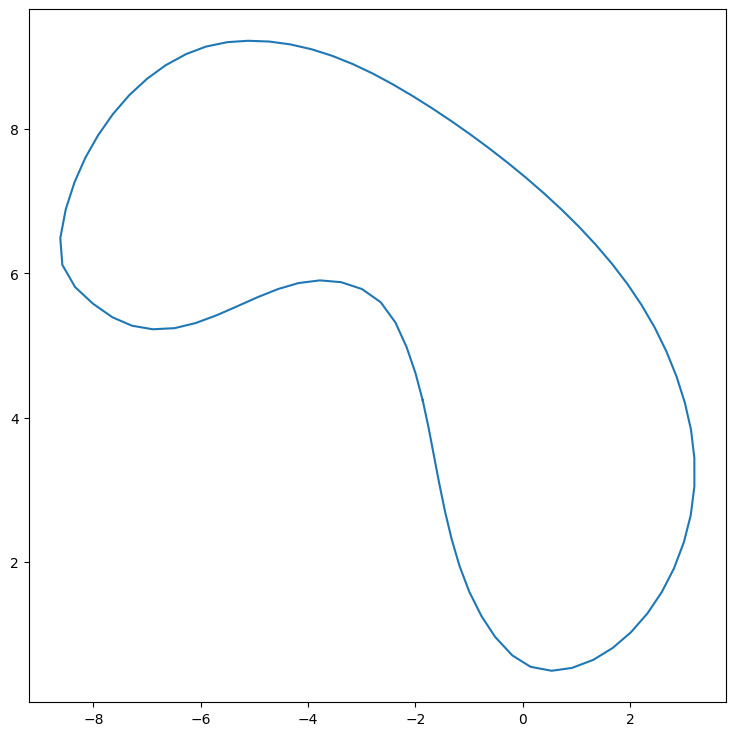

In [5]:
plt.figure(figsize=(9,9))
plt.plot(raw_data.iloc[:, 0], raw_data.iloc[:, 1])

In [6]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"maps/{MAP_NAME}.png"):
    map_img_path = f"maps/{MAP_NAME}.png"
elif os.path.exists(f"maps/{MAP_NAME}.pgm"):
    map_img_path = f"maps/{MAP_NAME}.pgm"
else:
    raise Exception("Map not found!")

map_yaml_path = f"maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# calculate map parameters
orig_x = origin[0]
orig_y = origin[1]
# ??? Should be 0
orig_s = np.sin(origin[2])
orig_c = np.cos(origin[2])

# get the distance transform
transformed_data = raw_data.copy()
transformed_data -= np.array([orig_x, orig_y, 0])
transformed_data.iloc[:, :2] /= map_resolution

raw_map_img = np.array(Image.open(map_img_path).transpose(Image.FLIP_TOP_BOTTOM))
raw_map_img = raw_map_img.astype(np.float64)


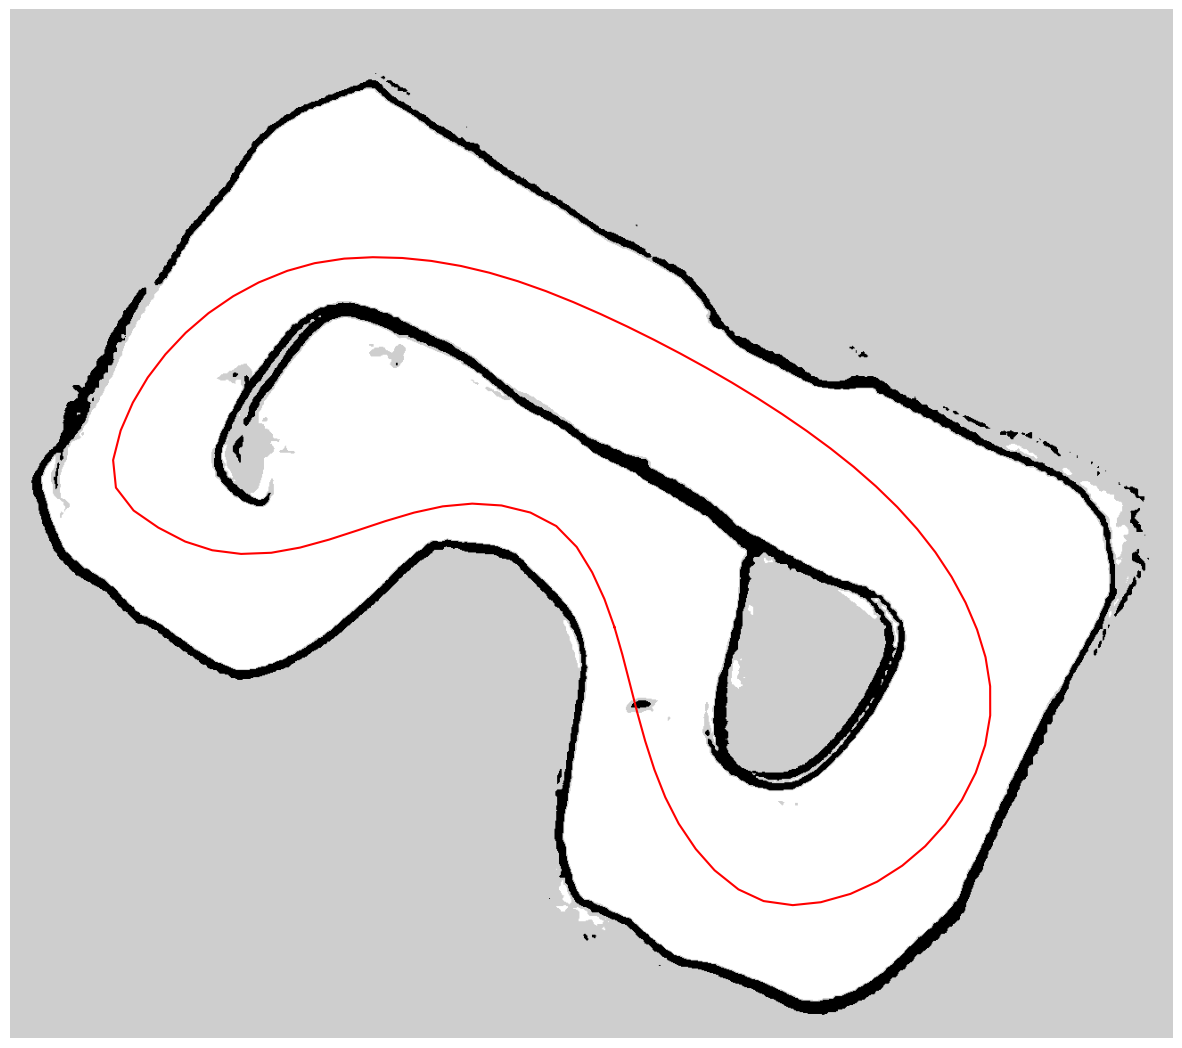

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')
# Save image without the axis
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline.png", bbox_inches='tight', pad_inches=0)

(-0.5, 1304.5, -0.5, 1154.5)

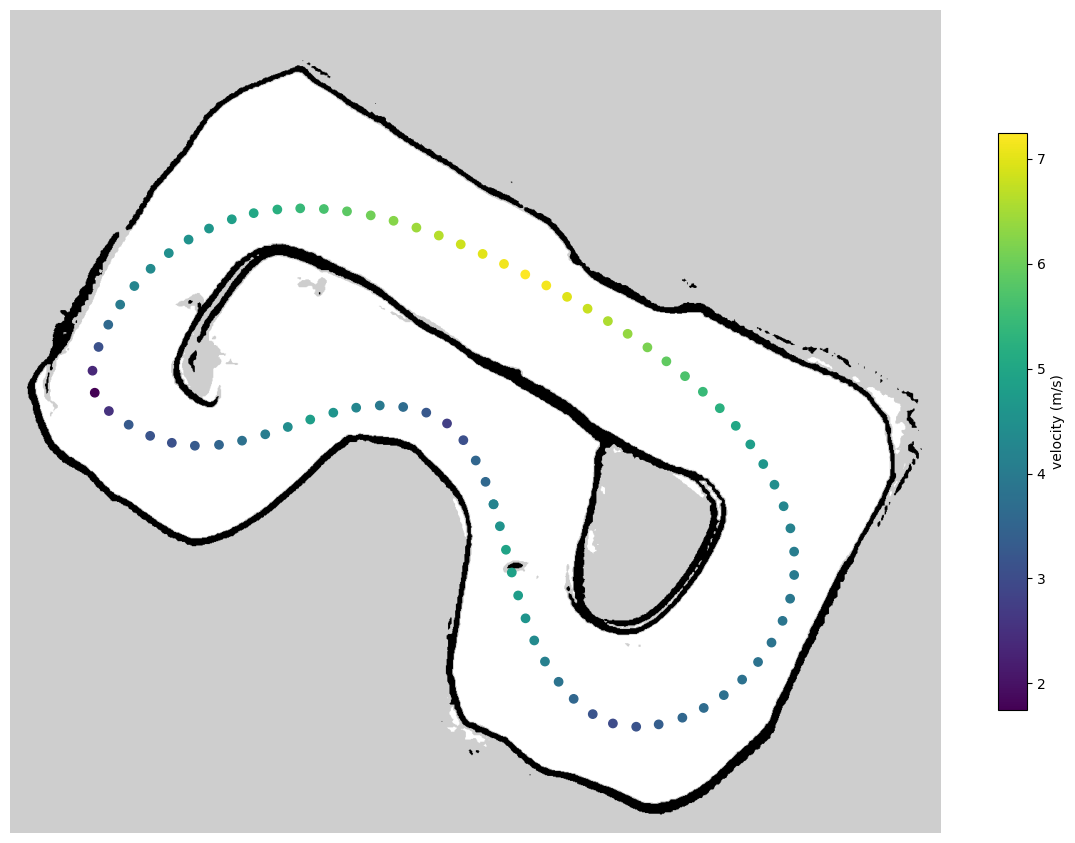

In [8]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')